# Facets of Mathematics: Regression Modelling

## End of theme assessment

Your completed assessment should consist of

1. This completed Jupyter notebook, including all requested code.

* **In-code comments** should be included to explain the steps of your code.

2. A LaTeX document containing the requested explanations. You can use `RM_eot.tex` as a starting point.

* The final document must be **no longer than three pages**.

* For each question, you should provide **explicit computations** for solving the problems. Whenever appropriate, you should also provide **theoretical justification** for your results, quoting lemmas, theorems, etc from the lectures, tutorial worksheets and/or references. 

* The Latex document should showcase the **ideas** and **methodology** that go into solving the problems. For instance, some questions require repeating the same computations over and over again. In such cases, it may be desireable to describe a single example in the Latex document, rather than spelling out every single calculation. 

* You can get a feel for what is required by considering the markdown text in the tutorial worksheets and solutions.


## Submission

Please upload **both** your final compiled PDF **and** your completed Jupyter notebook, via Learn.

You can download your completed Jupyter notebook from Noteable using `File` $\rightarrow$ `Download as` $\rightarrow$ `Notebook (.ipynb)`.

## Marking

This assessment is marked out of 15. Marks will be based on

**10 marks** Completeness and correctness.
- Questions should be answered fully and correctly.
- The discussion should be complete, relevant, and correct.
- You should correctly describe the methods used, and where appropriate relate the discussion to the theoretic background.
- All code should be clear, correct, and appropriately commented.

**5 marks** Presentation and use of LaTeX.
- LaTeX should be used correctly and appropriately.
- Text should be in grammatical sentences and free of typographical errors.
- Any formulae should be appropriately typeset.

A detailed mark scheme is available on Learn.

---

It may be useful for you to know that python allows you to store figures both as 'png' or 'pdf' files, using one of 
* `plt.savefig("figname.png", dpi=250)`
* `plt.savefig("figname.pdf", dpi=250)`
where the 'dpi=' specifies the resolution. You may want to choose another resolution but be aware that choosing it too large will result in massive files.

---

### Data

The data relevant to the assessment is stored in numpy array files called 'rm_eot_x.npy' (predictors) and 'rm_eot_y.npy' (responses). A description of the data is stored in the file 'README.txt'. 

---

### Question 1 - Data Description

Read the data description in the 'README.txt' file. Plot the response against each of the variables `[Existence of a graduate employment programme at the school, Motivation of teaching staff, Grade average]`. Include appropriate titles, labels, and legends. Add the plots to your LaTeX write-up. In your LaTeX write-up describe the data, referencing your figures where appropriate.

### Question 2 - Regression Analysis
Two regression models are proposed:
* A linear model: $y=\beta_0+\sum_j \beta_jx_j$.
* A logistic model: $y=g^{-1}\left(\beta_0+\sum_j \beta_jx_j\right)$ with $g(p)=\log\left(\frac{p}{1-p}\right)$.

Fit both models to obtain estimates $\hat\beta_{\mathrm{lin}}$ (for the linear model) and $\hat\beta_{\mathrm{log}}$ (for the logistic model). If necessary, you may use the function IRLS in the file 'IRLS.py'. In your write-up, include the respective estimates, and describe how you calculated them.

Create a plot with the data and the fitted values (for both models). Include appropriate titles, labels, and legends. Add the plots to your write-up, adding captions and references where appropriate.

Compute the root mean squared error for both models, and include these in your write-up.

### Question 3 - Model Comparison
Add a brief discussion to your write-up arguing which model is preferable. Give both a qualitative and a quantitative reason.



In [129]:
''' Load necessary '''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

''' Some commands to make the plots look nice and big. '''
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['lines.markersize'] = 7
plt.rcParams['lines.linewidth'] = 2

''' Define a function that allows one to quickly calculate the Root Mean Squared Error '''
def RMSE(obs, fit, axis=1):
    return np.sqrt(np.sum((obs-fit)**2)/len(obs))

''' Run the IRLS python file to have access to the Iteratively Reweighted Least Squares algorihtm '''
##%cd RM_eot
%run IRLS.py

''' Load the data which is stored in numpy arrays '''
x = np.load('rm_eot_x.npy') 
y = np.load('rm_eot_y.npy')

<Figure size 960x600 with 0 Axes>

In [48]:
print( x[:,0])

[0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0.]


x.shape (50, 3)
y.shape (50,)
x-5 [[  0.         -42.13784167  70.51543393]
 [  0.         -32.33059501  71.02932712]
 [  1.         -31.47284082  60.71935038]
 [  0.         -42.09557227  62.51259302]
 [  0.         -36.13281373  60.20588075]]
y-5 [0.5927541  0.52549059 0.73962243 0.86252526 0.80590026]
[0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0.]


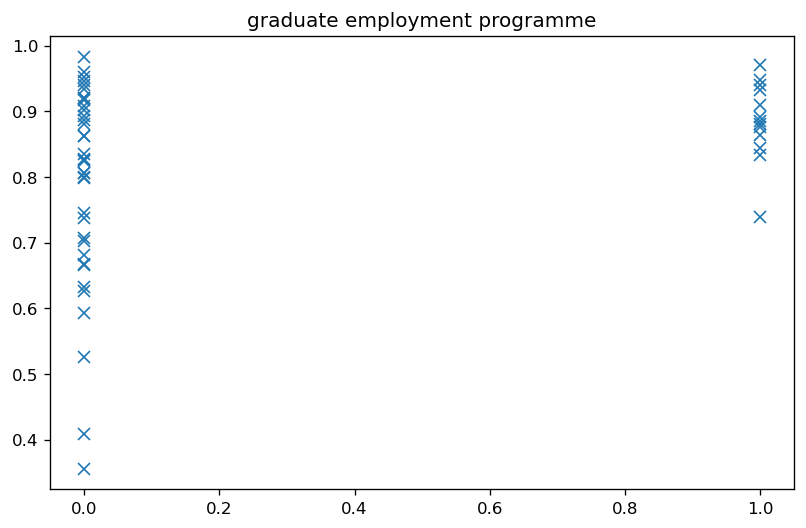

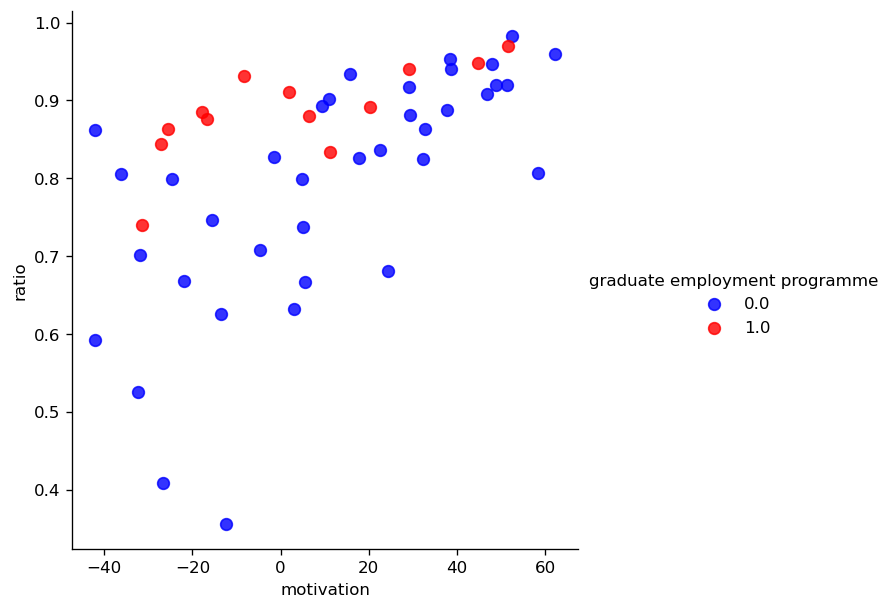

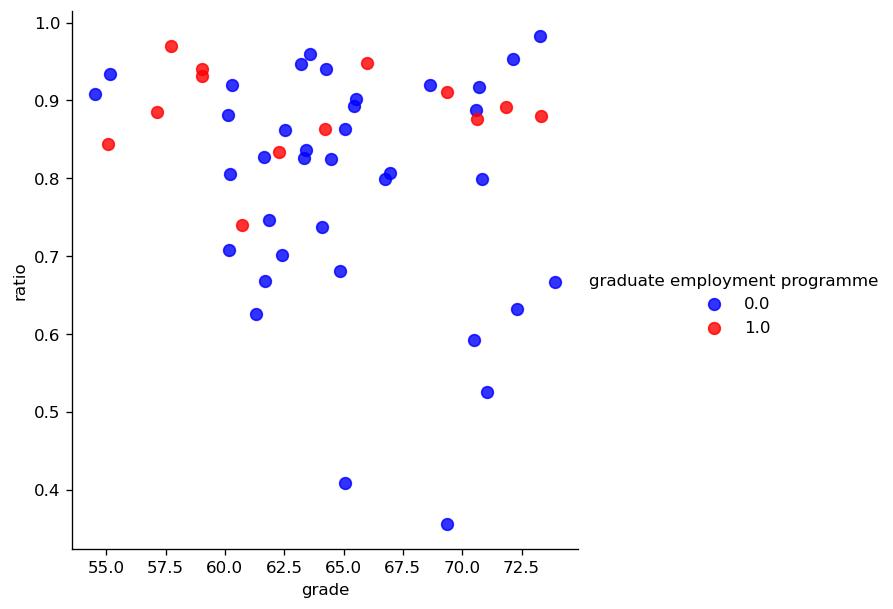

In [58]:
print('x.shape', x.shape)
print('y.shape', y.shape)
print('x-5', x[0:5])
print('y-5', y[0:5])
print(x[:,0])
import seaborn as sns
import pandas as pd
employment_df = pd.DataFrame({'motivation':x[:,1], 'grade':x[:,2], 'ratio': y, 'graduate employment programme':x[:,0]}) 
plt.title('graduate employment programme')
plt.plot(x[:,0],y, 'x')
plt.show()
#plt.title('motivation')
sns.lmplot(x='motivation', y='ratio', data=employment_df, hue='graduate employment programme', fit_reg=False, palette=['b','r']) 
#plt.show()
#plt.title('grade')
sns.lmplot(x='grade', y='ratio', data=employment_df, hue='graduate employment programme', fit_reg=False, palette=['b','r']) 


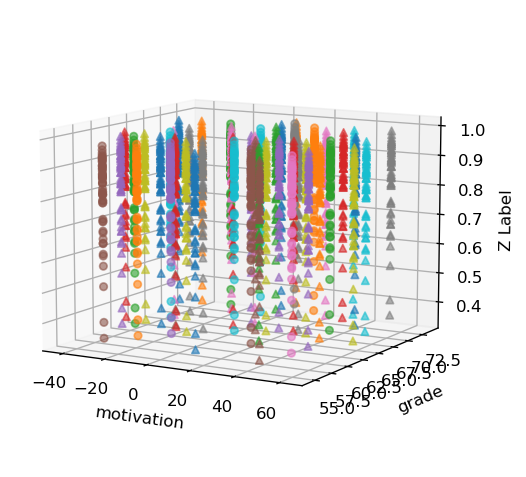

In [56]:
import matplotlib.pyplot as plt
import numpy as np



def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=10)
for i in range(len(y)):
    if x[i,0] == 0:
        m = '^'
    else:
        m = 'o'
    ax.scatter(x[i,1], x[i,2], y, marker=m, alpha=0.6)

ax.set_xlabel('motivation')
ax.set_ylabel('grade')
ax.set_zlabel('Z Label')

plt.show()

In [209]:
'''from sklearn.preprocessing import PolynomialFeatures
X = np.c_[np.ones(50),x]
poly = PolynomialFeatures(2)
#X = poly.fit_transform(X)
'''


(30,)


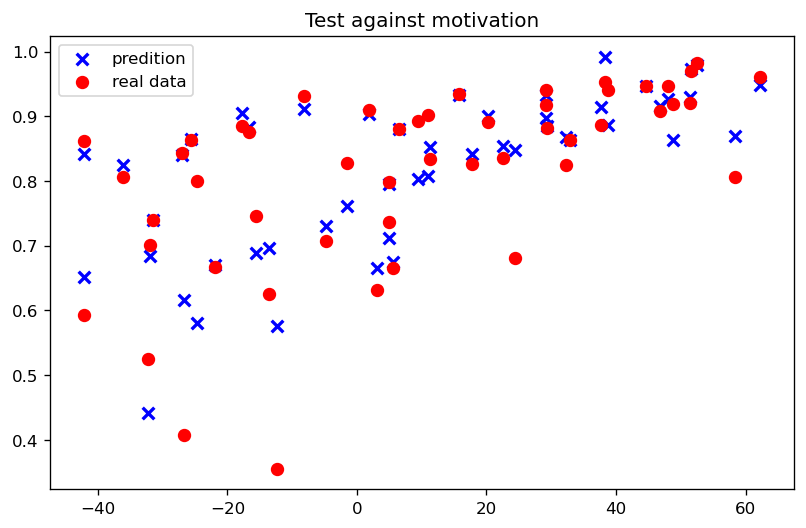

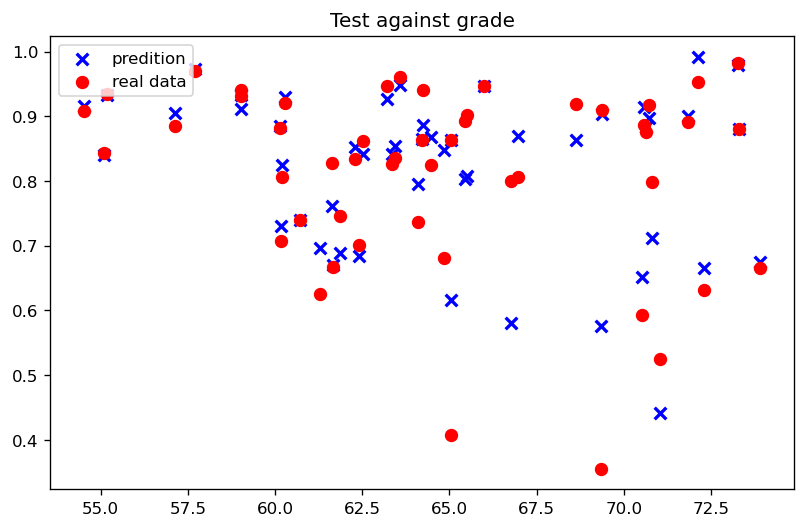

In [211]:
X = np.c_[np.ones(50),x,
          x[:,1]*x[:,2], x[:,0]*x[:,1], x[:,0]*x[:,2], x[:,1]**2, x[:,2]**2, 
          x[:,0]*x[:,1]**2, x[:,0]*x[:,2]**2, x[:,2]*x[:,1]**2, x[:,1]*x[:,2]**2, x[:,0]*x[:,1]*x[:,2], x[:,1]**3, x[:,2]**3]
X = np.c_[X, x[:,0]*x[:,1]**3, x[:,0]*x[:,2]**3, x[:,0]*x[:,2]*x[:,1]**2, x[:,0]*x[:,1]*x[:,2]**2, x[:,1]**3*x[:,2], x[:,1]**2 * x[:,2]**2, x[:,1]*x[:,2]**3, x[:,1]**4, x[:,2]**4,
         x[:,0]*x[:,1]**4, x[:,0]*x[:,2]**4,x[:,1]**3*x[:,2]**2,x[:,1]**5,x[:,2]**5]

#using linear regression model

beta_hat = np.dot(np.linalg.inv(np.dot(X.transpose(), X)),(np.dot(X.transpose(),y)))
print(beta_hat.shape)
yl_hat = np.dot(X,beta_hat)
plt.title('Test against motivation')
plt.scatter(X[:,2], yl_hat, c='b', marker='x', label='predition')
plt.scatter(X[:,2], y, c='r', marker='o', label='real data')
plt.legend(loc='upper left')
plt.show()
plt.title('Test against grade')
plt.scatter(X[:,3], yl_hat, c='b', marker='x', label='predition')
plt.scatter(X[:,3], y, c='r', marker='o', label='real data')
plt.legend(loc='upper left')
plt.show()

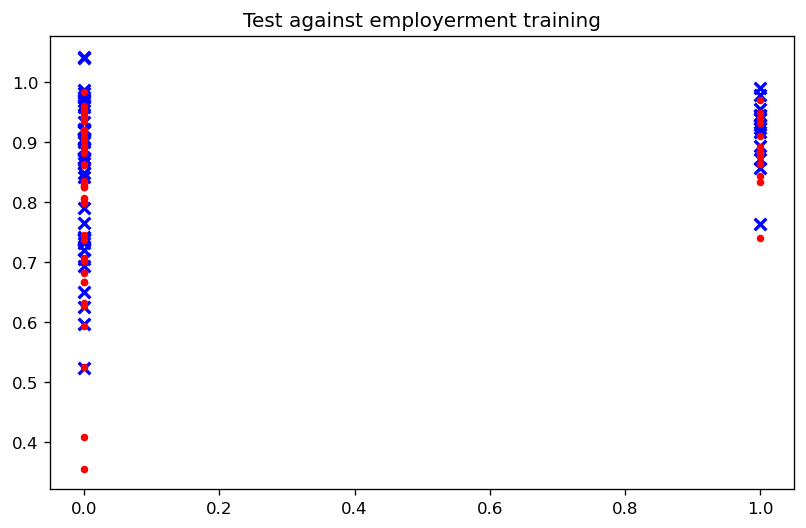

In [165]:
# Testing against take the employerment training
plt.title('Test against employerment training')
plt.scatter(X[:,1], yl_hat, c='b', marker='x', label='predition')
plt.scatter(X[:,1], y, c='r', marker='.', label='real data')
plt.show()

In [212]:
RMSE_lin = np.sqrt(np.average((y-yl_hat)**2))
print(RMSE_lin)

0.06913495490877361


In [213]:
# Using logistic regression
n=X.shape[1]
beta_start = np.ones(n) * 0
beta_LG0 = IRLS(beta_start,X,y)
print(beta_LG0)

[ 4.44816074e+04 -1.19567571e+04 -2.25599267e+01 -3.41926526e+03
  1.08740505e+00 -2.74307582e+00  7.16103622e+02  7.98741365e-02
  1.04909477e+02  3.07730590e-02 -1.60587122e+01 -2.42262364e-03
 -1.74144111e-02  7.49358181e-02 -2.13847277e-03 -1.60604399e+00
  1.92806203e-04  1.59815673e-01 -4.45160302e-04 -5.33506412e-04
  6.56328639e-05  1.82965142e-05  9.27768024e-05  2.60963308e-07
  1.22687146e-02 -3.73767779e-06 -5.95498284e-04 -5.03975389e-07
 -2.83900159e-09 -3.74174742e-05]


0.06999653698733371


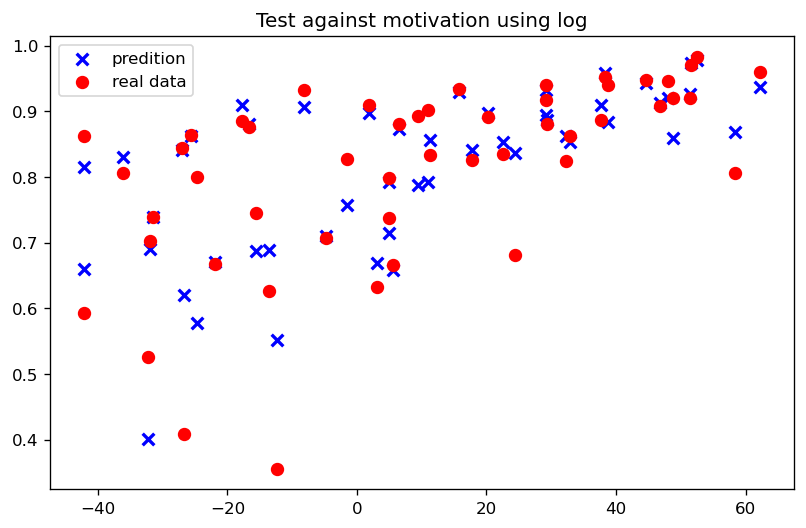

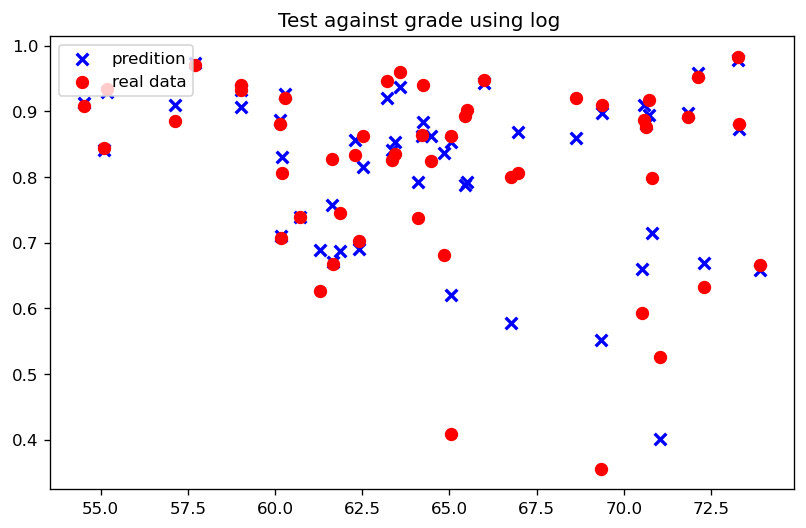

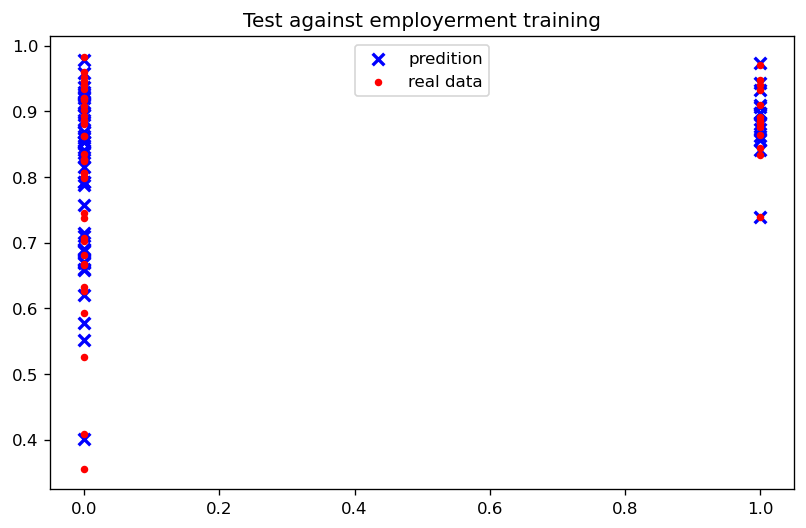

In [160]:
y_hat =  1/(1+np.exp(-np.dot(beta_LG0,X.T)))
rmse_log = np.sqrt(np.average((y-y_hat)**2))
print(rmse_log)
plt.title('Test against motivation using log')
plt.scatter(X[:,2], y_hat, c='b', marker='x', label='predition')
plt.scatter(X[:,2], y, c='r', marker='o', label='real data')
plt.legend(loc='upper left')
plt.show()
plt.title('Test against grade using log ')
plt.scatter(X[:,3], y_hat, c='b', marker='x', label='predition')
plt.scatter(X[:,3], y, c='r', marker='o', label='real data')
plt.legend(loc='upper left')
plt.show()
plt.title('Test against employerment training')
plt.scatter(X[:,1], y_hat, c='b', marker='x', label='predition')
plt.scatter(X[:,1], y, c='r', marker='.', label='real data')
plt.legend(loc='upper center')

plt.show()

Text(0.5, 1.0, 'logistic regression')

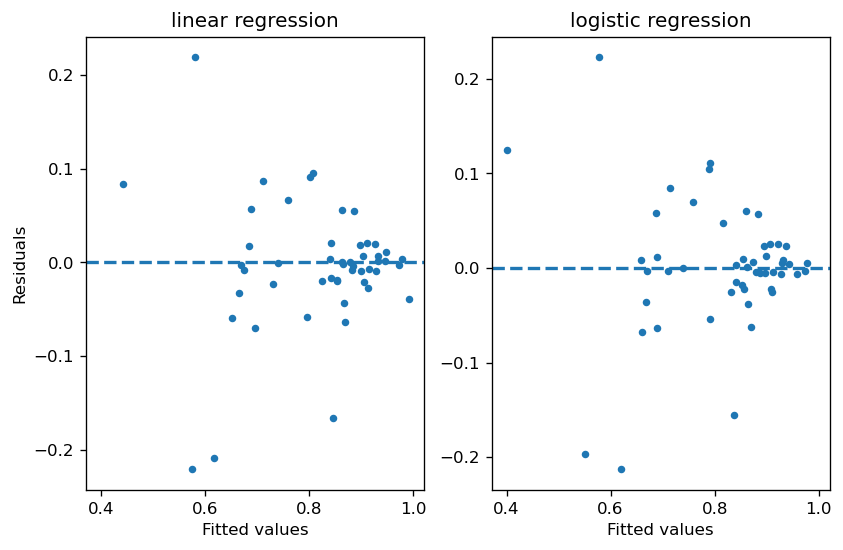

In [161]:
residuals1 = y - yl_hat
residuals2 = y - y_hat
fits1 = yl_hat
fits2 = y_hat

f, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
ax1.plot(fits1, residuals1,'.')
ax1.set_ylabel("Residuals")
ax1.set_xlabel("Fitted values")
ax1.axhline(y=0, ls='--')
ax1.set_title("linear regression")

ax2.plot(fits2, residuals2,'.')
#ax2.set_ylabel("Residuals")
ax2.set_xlabel("Fitted values")
ax2.axhline(y=0, ls='--')
ax2.set_title("logistic regression")